In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

from sklearn.metrics import accuracy_score
import missingno as msno

In [149]:
import pandas as pd

#%%
def change_to_cat(my_df,threshold = 5):
    '''
    function that takes a dataframe and an integer
    and outputs a two-list containging:
    a copy of the dataframe with column types changed to "category" if the amount of different values is lower or equal to the integer
    a dataframe containing all the unique values from original dataframe
    '''
    temp_df = my_df.copy()
    
    #creation of copy with types changed to "category"
    cat_var = [col for col in temp_df.columns if ( (len(temp_df[col].unique()) <=threshold) or (temp_df[col].dtype=='O') )]  
    temp_df[cat_var]=temp_df[cat_var].astype("category")

    #creation of the df with unique values only
    temp_df_unique = pd.DataFrame.from_dict({var : sorted(list(temp_df[var].unique()), key= lambda x: str(x)) for var in cat_var}, orient='index').T
    return [temp_df,temp_df_unique]
# %%
def check_almost_duplicates(df):
    '''
    df must be output of change_to_cat[0]
    '''
    df_temp=pd.DataFrame()
    from difflib import SequenceMatcher
    for col in df.columns:
        series_of_column = df[col]
        boolean_series_of_column = pd.DataFrame({col : [False]*len(df)},index=df.index)[col]
        for iterating_line in range(len(df)-1):
            for comparing_line in range(iterating_line+1,len(df)):
                if SequenceMatcher(None, str(series_of_column.iloc[iterating_line]),str(series_of_column.iloc[comparing_line])).ratio()>0.9:
                    boolean_series_of_column.iloc[iterating_line]=True
                    boolean_series_of_column.iloc[comparing_line]=True
        df_temp = pd.concat([df_temp, df[boolean_series_of_column]], axis = 1)
    return df_temp
# %%
df = pd.DataFrame({'var': ['caggle','ciggle'],'vour': ['caggle','cigascxyxc gggle']})
# %%
check_almost_duplicates(df)
# %%
pd.concat([pd.DataFrame(),df], axis = 1)
# %%
df.index

RangeIndex(start=0, stop=2, step=1)

In [11]:

#import os, sys
#sys.path.append(os.path.dirname(os.getcwd()) + "\general_python_scripts") #need to add folder "general_python_scripts" to path to be able to import following module
#import data_cleaning_functions


ModuleNotFoundError: No module named 'data_cleaning_functions'

None


In [150]:
df=pd.read_csv("train.csv").drop('id', axis=1)
df= df[sorted(df.columns)] #sorts columns alphabetically

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54607 entries, 0 to 54606
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               29892 non-null  float64
 1   capital_gains     29716 non-null  float64
 2   capital_losses    29850 non-null  float64
 3   citizenship       54607 non-null  object 
 4   class_worker      54607 non-null  object 
 5   country_father    52581 non-null  object 
 6   country_mother    52818 non-null  object 
 7   country_self      53532 non-null  object 
 8   det_hh_fam_stat   54607 non-null  object 
 9   det_hh_summ       54607 non-null  object 
 10  education         29786 non-null  object 
 11  fam_under_18      54607 non-null  object 
 12  full_or_part_emp  54607 non-null  object 
 13  high_income       54607 non-null  int64  
 14  hisp_origin       54377 non-null  object 
 15  hs_college        29771 non-null  object 
 16  ind_code_level1   54607 non-null  object

In [92]:
df

,age,capital_gains,capital_losses,citizenship,class_worker,country_father,country_mother,country_self,det_hh_fam_stat,det_hh_summ,...,sex,state_prev_res,stock_dividends,tax_filer_stat,unemp_reason,union_member,vet_benefits,vet_question,wage_per_hour,weeks_worked
0,42.0,0.0,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Householder,Householder,...,Female,Not in universe,0.0,Nonfiler,Not in universe,Not in universe,2,Not in universe,0.0,0.0
1,56.0,NaN,NaN,Native- Born in the United States,Self-employed-incorporated,United-States,United-States,United-States,Householder,Householder,...,Male,Not in universe,NaN,NaN,NaN,Not in universe,2,Not in universe,0.0,NaN
2,26.0,NaN,NaN,Foreign born- Not a citizen of U S,Private,Haiti,Haiti,Haiti,Householder,Householder,...,NaN,Not in universe,NaN,Joint both under 65,NaN,Not in universe,2,Not in universe,0.0,NaN
3,67.0,0.0,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Householder,Householder,...,NaN,North Carolina,NaN,Joint one under 65 & one 65+,NaN,Not in universe,1,No,0.0,0.0
4,NaN,0.0,0.0,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Child <18 never marr not in subfamily,Child under 18 never married,...,Female,Not in universe,NaN,Nonfiler,Not in universe,Not in universe,0,Not in universe,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54602,NaN,NaN,NaN,Native- Born in the United States,Private,United-States,United-States,United-States,Householder,Householder,...,NaN,Not in universe,NaN,NaN,NaN,Not in universe,2,Not in universe,0.0,NaN
54603,32.0,0.0,0.0,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Nonfamily householder,Householder,...,Female,Not in universe,0.0,Nonfiler,NaN,Not in universe,2,Not in universe,NaN,0.0
54604,22.0,NaN,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Child 18+ never marr Not in a subfamily,Child 18 or older,...,Male,Not in universe,NaN,NaN,Not in universe,Not in universe,2,Not in universe,0.0,12.0
54605,4.0,0.0,0.0,Native- Born in Puerto Rico or U S Outlying,Not in universe,Trinadad&Tobago,United-States,Puerto-Rico,Child <18 never marr not in subfamily,Child under 18 never married,...,Male,Not in universe,0.0,Nonfiler,Not in universe,Not in universe,0,Not in universe,0.0,0.0


In [80]:
#df[df=="Not in universe"]=np.nan

,age,capital_gains,capital_losses,citizenship,class_worker,country_father,country_mother,country_self,det_hh_fam_stat,det_hh_summ,...,sex,state_prev_res,stock_dividends,tax_filer_stat,unemp_reason,union_member,vet_benefits,vet_question,wage_per_hour,weeks_worked
0,42.0,0.0,NaN,Native- Born in the United States,NaN,United-States,United-States,United-States,Householder,Householder,...,Female,NaN,0.0,Nonfiler,NaN,NaN,2,NaN,0.0,0.0
1,56.0,NaN,NaN,Native- Born in the United States,Self-employed-incorporated,United-States,United-States,United-States,Householder,Householder,...,Male,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN
2,26.0,NaN,NaN,Foreign born- Not a citizen of U S,Private,Haiti,Haiti,Haiti,Householder,Householder,...,NaN,NaN,NaN,Joint both under 65,NaN,NaN,2,NaN,0.0,NaN
3,67.0,0.0,NaN,Native- Born in the United States,NaN,United-States,United-States,United-States,Householder,Householder,...,NaN,North Carolina,NaN,Joint one under 65 & one 65+,NaN,NaN,1,No,0.0,0.0
4,NaN,0.0,0.0,Native- Born in the United States,NaN,United-States,United-States,United-States,Child <18 never marr not in subfamily,Child under 18 never married,...,Female,NaN,NaN,Nonfiler,NaN,NaN,0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54602,NaN,NaN,NaN,Native- Born in the United States,Private,United-States,United-States,United-States,Householder,Householder,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,NaN
54603,32.0,0.0,0.0,Native- Born in the United States,NaN,United-States,United-States,United-States,Nonfamily householder,Householder,...,Female,NaN,0.0,Nonfiler,NaN,NaN,2,NaN,NaN,0.0
54604,22.0,NaN,NaN,Native- Born in the United States,NaN,United-States,United-States,United-States,Child 18+ never marr Not in a subfamily,Child 18 or older,...,Male,NaN,NaN,NaN,NaN,NaN,2,NaN,0.0,12.0
54605,4.0,0.0,0.0,Native- Born in Puerto Rico or U S Outlying,NaN,Trinadad&Tobago,United-States,Puerto-Rico,Child <18 never marr not in subfamily,Child under 18 never married,...,Male,NaN,0.0,Nonfiler,NaN,NaN,0,NaN,0.0,0.0


In [136]:
# identifying categorical data
df, categories = change_to_cat(df,threshold=10)

## Visualizing correlation between columns

In [96]:
df.corr().style.background_gradient(cmap="Blues")

,age,capital_gains,capital_losses,ind_code_level2,occ_code_level2,stock_dividends,wage_per_hour,weeks_worked
age,1.000000,0.086846,0.032291,0.172557,0.096012,0.139129,0.025130,0.270199
capital_gains,0.086846,1.000000,-0.012877,0.112036,0.010428,0.073411,-0.013556,0.160852
capital_losses,0.032291,-0.012877,1.000000,0.104572,0.038600,0.007851,0.012055,0.072779
ind_code_level2,0.172557,0.112036,0.104572,1.000000,0.424268,0.024666,0.145442,0.745850
occ_code_level2,0.096012,0.010428,0.038600,0.424268,1.000000,-0.026364,0.175640,0.552565
stock_dividends,0.139129,0.073411,0.007851,0.024666,-0.026364,1.000000,-0.012603,0.073053
wage_per_hour,0.025130,-0.013556,0.012055,0.145442,0.175640,-0.012603,1.000000,0.145167
weeks_worked,0.270199,0.160852,0.072779,0.745850,0.552565,0.073053,0.145167,1.000000


## analyzing missing values
checking all rows containing NaN's

In [137]:
null_per_column = pd.DataFrame({ col : [df[col].isnull().sum().sum()] for col in df.columns if df[col].isnull().sum().sum()!=0}, index=['number_of_nan',"ratio_of_nan"]).T.sort_values('number_of_nan')
null_per_column['ratio_of_nan'] = null_per_column['number_of_nan']/len(df)
null_per_column

,number_of_nan,ratio_of_nan
state_prev_res,184,0.003370
hisp_origin,230,0.004212
country_self,1075,0.019686
country_mother,1789,0.032761
country_father,2026,0.037101
weeks_worked,24197,0.443112
sex,24534,0.449283
age,24715,0.452598
capital_losses,24757,0.453367
education,24821,0.454539


In [151]:
df_at_least_one_missing = df[df.isna().any(axis=1)]
df_no_missing = df.dropna()

In [99]:
print(len(df_at_least_one_missing))
print(len(df_no_missing))

54216
391


In [100]:
df_of_amount_of_nan = pd.DataFrame({"col" : [df.loc[k].isna().sum() for k in df.index]}, index = df.index)
df_of_amount_of_nan.columns=['number_of_nan']
df_of_amount_of_nan.sort_values('number_of_nan')

,number_of_nan
10089,0
21853,0
39456,0
26000,0
18346,0
...,...
23668,19
47700,19
20807,19
37154,19


## regression on data set without missing values

In [155]:
df_no_missing
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
tree= DecisionTreeClassifier()
Y = df_no_missing[['high_income']]
X = df_no_missing.drop('high_income', axis=1).copy()

TypeError: 'Series' object is not callable

In [156]:
x_train,x_test, y_train, y_test = train_test_split(X,Y, test_size=0.7, random_state=40)

In [157]:
tree.fit(x_train,y_train)

ValueError: could not convert string to float: 'Native- Born in the United States'

In [104]:
reg.fit(x_train,y_train)

ValueError: could not convert string to float: 'Native- Born in the United States'

### Visualizing missing values
source [here](https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea)


<AxesSubplot:>

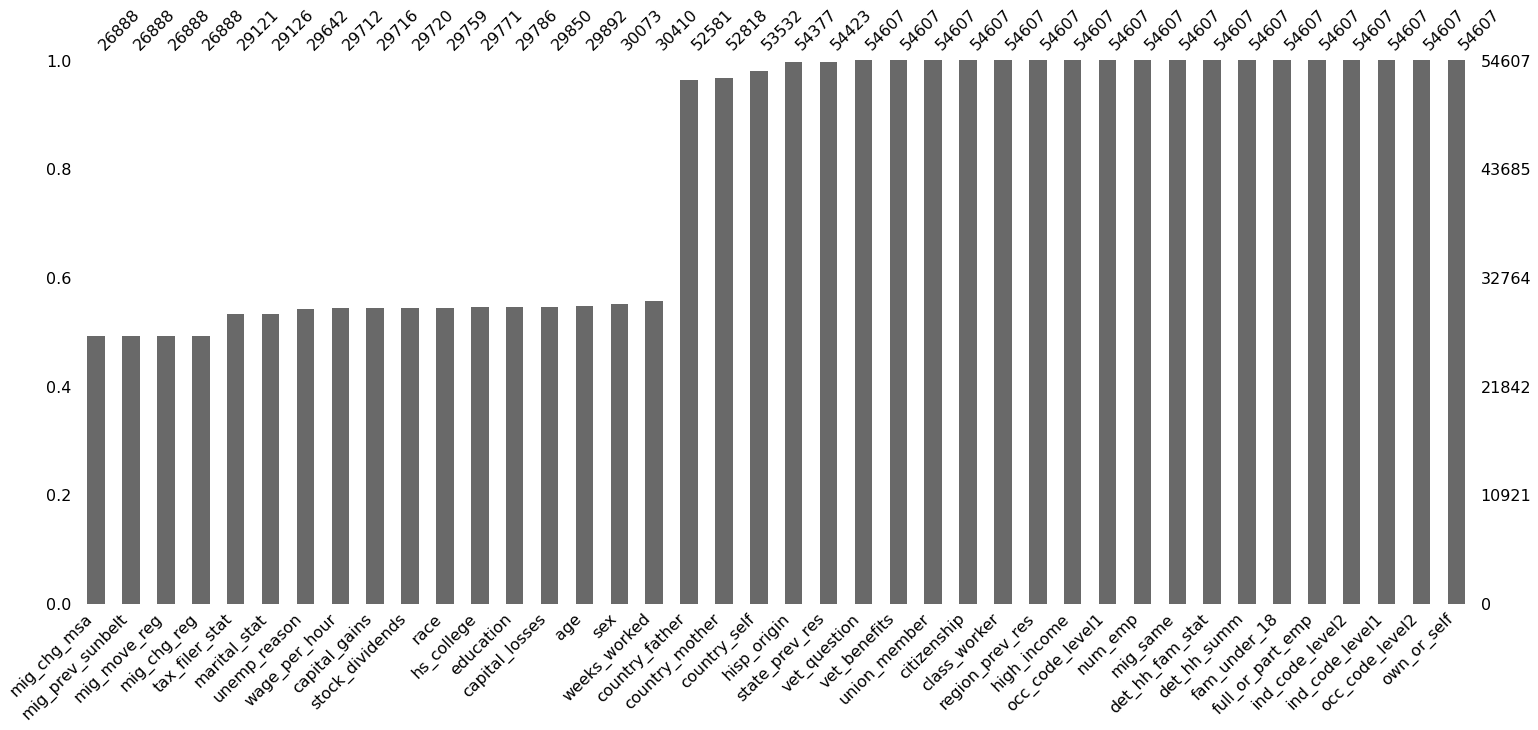

In [28]:
# Gives a bar chart of the missing values
msno.bar(df,sort="ascending")

one possibility could be cutting at 0.6

<AxesSubplot:>

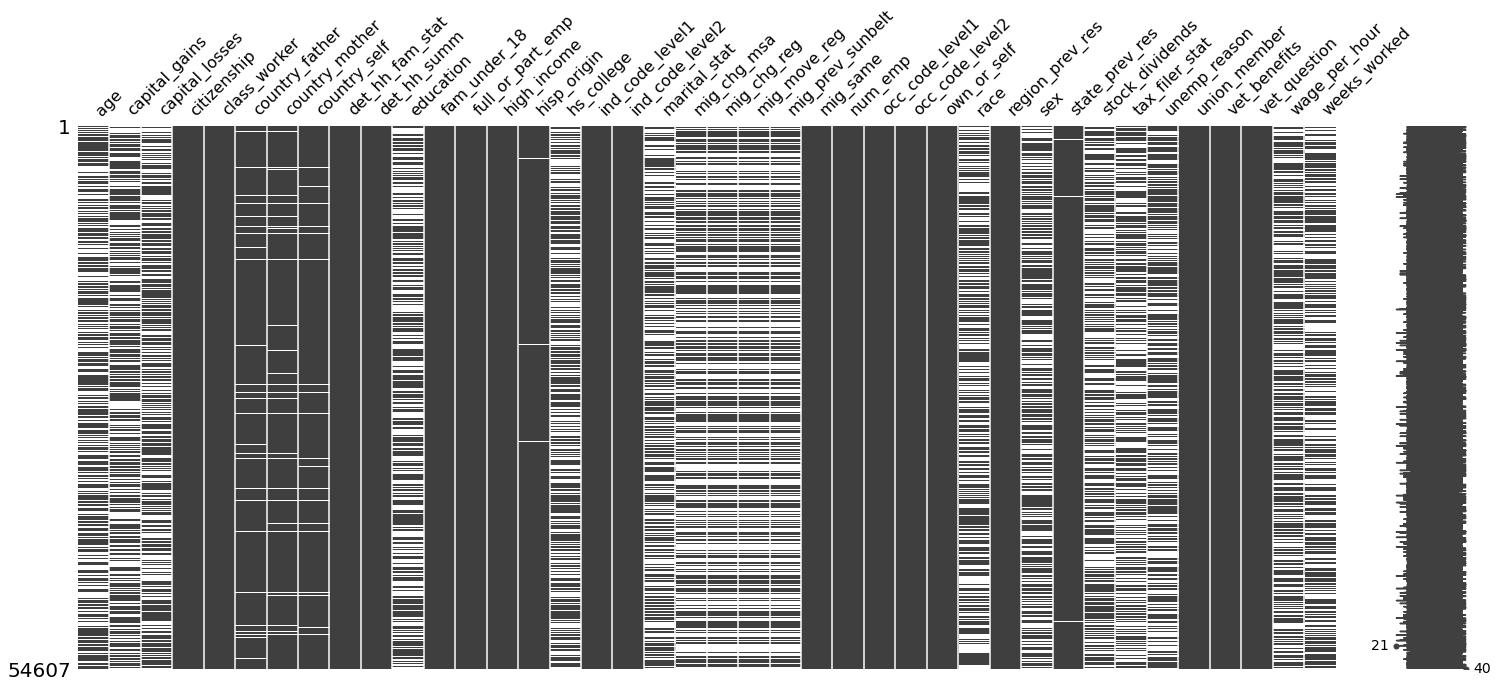

In [29]:
# Gives positional information of the missing values
msno.matrix(df)

<AxesSubplot:>

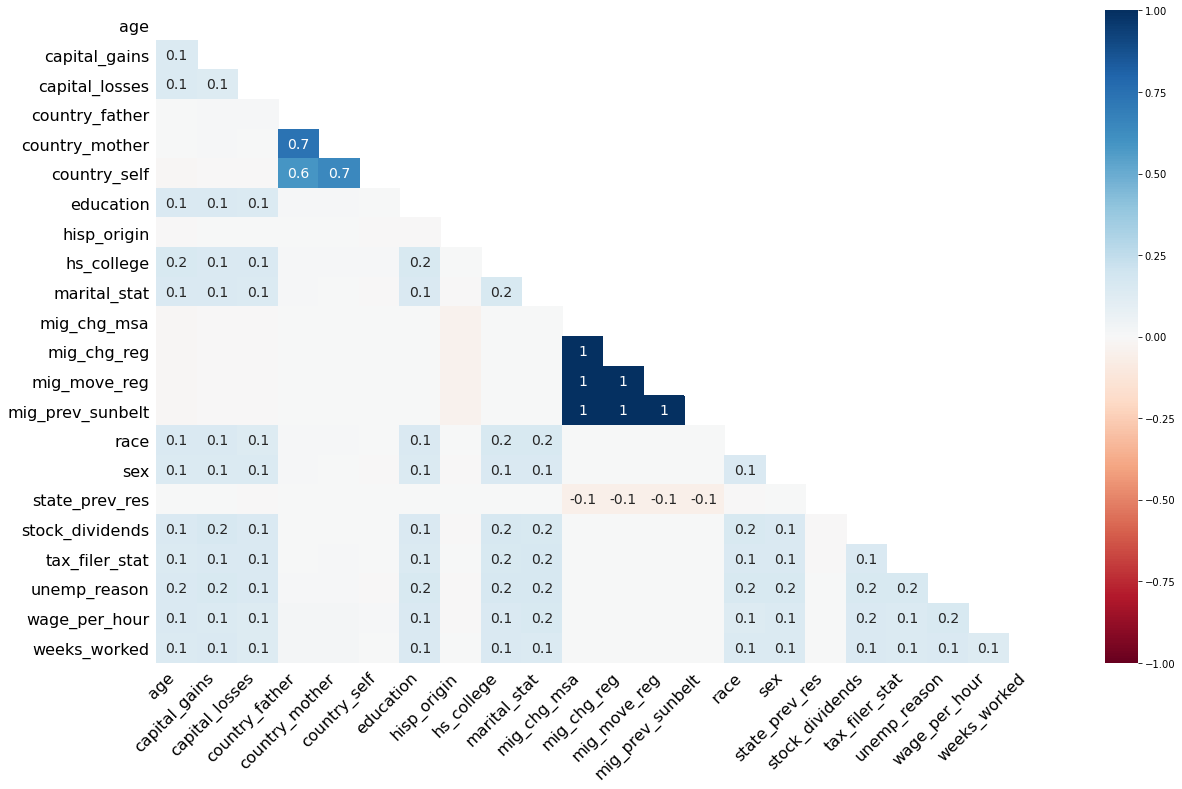

In [30]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)

## Dealing with nan values

### on columns

In [31]:
threshold = 0.5
columns_to_remove = list(null_per_column[null_per_column['ratio_of_nan'] > threshold].index)
columns_to_remove
df = df.drop(columns_to_remove, axis=1)

In [32]:
df

,age,capital_gains,capital_losses,citizenship,class_worker,country_father,country_mother,country_self,det_hh_fam_stat,det_hh_summ,...,sex,state_prev_res,stock_dividends,tax_filer_stat,unemp_reason,union_member,vet_benefits,vet_question,wage_per_hour,weeks_worked
0,42.0,0.0,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Householder,Householder,...,Female,Not in universe,0.0,Nonfiler,Not in universe,Not in universe,2,Not in universe,0.0,0.0
1,56.0,NaN,NaN,Native- Born in the United States,Self-employed-incorporated,United-States,United-States,United-States,Householder,Householder,...,Male,Not in universe,NaN,NaN,NaN,Not in universe,2,Not in universe,0.0,NaN
2,26.0,NaN,NaN,Foreign born- Not a citizen of U S,Private,Haiti,Haiti,Haiti,Householder,Householder,...,NaN,Not in universe,NaN,Joint both under 65,NaN,Not in universe,2,Not in universe,0.0,NaN
3,67.0,0.0,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Householder,Householder,...,NaN,North Carolina,NaN,Joint one under 65 & one 65+,NaN,Not in universe,1,No,0.0,0.0
4,NaN,0.0,0.0,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Child <18 never marr not in subfamily,Child under 18 never married,...,Female,Not in universe,NaN,Nonfiler,Not in universe,Not in universe,0,Not in universe,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54602,NaN,NaN,NaN,Native- Born in the United States,Private,United-States,United-States,United-States,Householder,Householder,...,NaN,Not in universe,NaN,NaN,NaN,Not in universe,2,Not in universe,0.0,NaN
54603,32.0,0.0,0.0,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Nonfamily householder,Householder,...,Female,Not in universe,0.0,Nonfiler,NaN,Not in universe,2,Not in universe,NaN,0.0
54604,22.0,NaN,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Child 18+ never marr Not in a subfamily,Child 18 or older,...,Male,Not in universe,NaN,NaN,Not in universe,Not in universe,2,Not in universe,0.0,12.0
54605,4.0,0.0,0.0,Native- Born in Puerto Rico or U S Outlying,Not in universe,Trinadad&Tobago,United-States,Puerto-Rico,Child <18 never marr not in subfamily,Child under 18 never married,...,Male,Not in universe,0.0,Nonfiler,Not in universe,Not in universe,0,Not in universe,0.0,0.0


By removing columns that had more than 50% of missing values, we are removing 4 predictor out of 40. 

### re-visualization after removing columns

<AxesSubplot:>

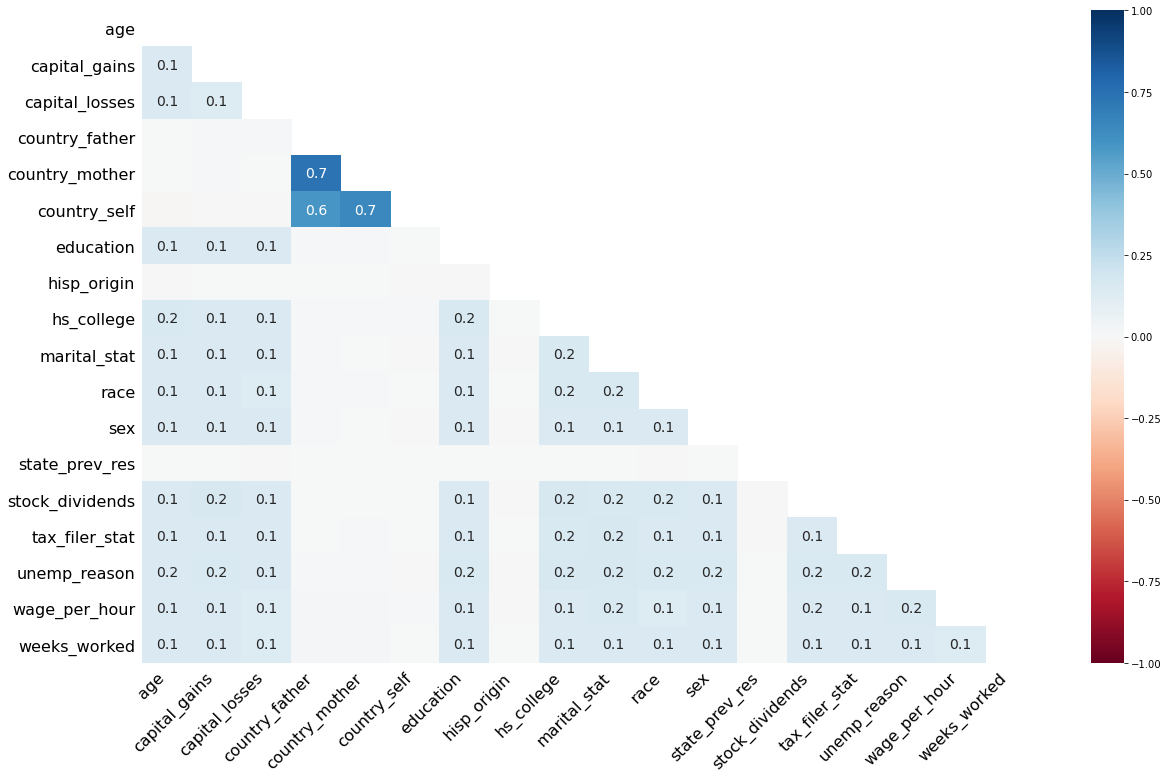

In [33]:
# Gives a heatmap of how missing values are related
msno.heatmap(df)

### on rows

In [34]:
df_of_amount_of_nan = pd.DataFrame({"col" : [df.loc[k].isna().sum() for k in df.index]}, index = df.index)
df_of_amount_of_nan.columns=['number_of_nan']
df_of_amount_of_nan.sort_values('number_of_nan')

,number_of_nan
22084,0
45945,0
22433,0
22396,0
46041,0
...,...
215,15
37853,15
21818,15
44374,15


In [35]:
df_at_least_one_missing = df[df.isna().any(axis=1)]
df_no_missing = df.dropna()

In [36]:
print(len(df_at_least_one_missing))
print(len(df_no_missing))

53813
794


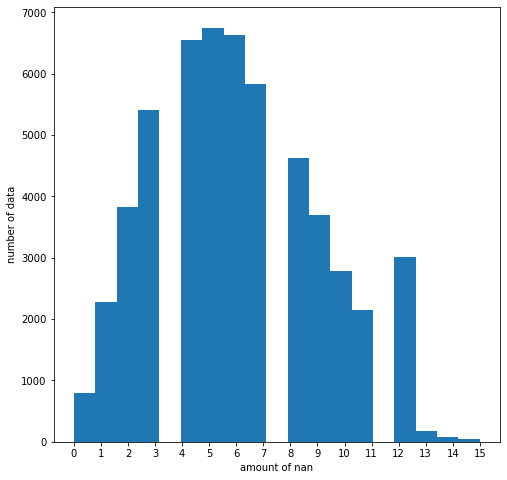

In [102]:
plt.figure(figsize=(8,8))
plt.xlabel('amount of nan')
plt.ylabel('number of data')
plt.xticks([k for k in range(20)])
plt.hist(df_of_amount_of_nan, 19);

In [122]:
threshold = 8
index_to_drop = df_of_amount_of_nan[df_of_amount_of_nan['number_of_nan'] > threshold].index
df_below_nan_threshold = df.drop(index_to_drop, axis=0)

In [76]:
print("new amount of data with at least one nan value : ", len(df_below_nan_threshold[df_below_nan_threshold.isna().any(axis=1)]))

new amount of data with at least one nan value :  41868


Now re remove rows that have more than 8 missing values. We get from 53813 missing values (when columns were removed) to 41868. 

In [104]:
null_per_column = pd.DataFrame({ col : [df_below_nan_threshold[col].isnull().sum().sum()] for col in df_below_nan_threshold.columns if df_below_nan_threshold[col].isnull().sum().sum()!=0}, index=['number_of_nan']).T.sort_values('number_of_nan')
null_per_column

,number_of_nan
state_prev_res,118
hisp_origin,165
country_self,537
country_mother,918
country_father,1070
weeks_worked,14902
sex,15152
hs_college,15265
unemp_reason,15304
age,15328


In [106]:
df

,age,capital_gains,capital_losses,citizenship,class_worker,country_father,country_mother,country_self,det_hh_fam_stat,det_hh_summ,...,sex,state_prev_res,stock_dividends,tax_filer_stat,unemp_reason,union_member,vet_benefits,vet_question,wage_per_hour,weeks_worked
0,42.0,0.0,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Householder,Householder,...,Female,Not in universe,0.0,Nonfiler,Not in universe,Not in universe,2,Not in universe,0.0,0.0
1,56.0,NaN,NaN,Native- Born in the United States,Self-employed-incorporated,United-States,United-States,United-States,Householder,Householder,...,Male,Not in universe,NaN,NaN,NaN,Not in universe,2,Not in universe,0.0,NaN
2,26.0,NaN,NaN,Foreign born- Not a citizen of U S,Private,Haiti,Haiti,Haiti,Householder,Householder,...,NaN,Not in universe,NaN,Joint both under 65,NaN,Not in universe,2,Not in universe,0.0,NaN
3,67.0,0.0,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Householder,Householder,...,NaN,North Carolina,NaN,Joint one under 65 & one 65+,NaN,Not in universe,1,No,0.0,0.0
4,NaN,0.0,0.0,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Child <18 never marr not in subfamily,Child under 18 never married,...,Female,Not in universe,NaN,Nonfiler,Not in universe,Not in universe,0,Not in universe,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54602,NaN,NaN,NaN,Native- Born in the United States,Private,United-States,United-States,United-States,Householder,Householder,...,NaN,Not in universe,NaN,NaN,NaN,Not in universe,2,Not in universe,0.0,NaN
54603,32.0,0.0,0.0,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Nonfamily householder,Householder,...,Female,Not in universe,0.0,Nonfiler,NaN,Not in universe,2,Not in universe,NaN,0.0
54604,22.0,NaN,NaN,Native- Born in the United States,Not in universe,United-States,United-States,United-States,Child 18+ never marr Not in a subfamily,Child 18 or older,...,Male,Not in universe,NaN,NaN,Not in universe,Not in universe,2,Not in universe,0.0,12.0
54605,4.0,0.0,0.0,Native- Born in Puerto Rico or U S Outlying,Not in universe,Trinadad&Tobago,United-States,Puerto-Rico,Child <18 never marr not in subfamily,Child under 18 never married,...,Male,Not in universe,0.0,Nonfiler,Not in universe,Not in universe,0,Not in universe,0.0,0.0


## removing mare predictor

In [120]:
threshold = 0.4
columns_to_remove = list(null_per_column[null_per_column['ratio_of_nan'] > threshold].index)
columns_to_remove
df = df.drop(columns_to_remove, axis=1)
df_at_least_one_missing = df[df.isna().any(axis=1)]
df_no_missing = df.dropna()
threshold = 8
index_to_drop = df_of_amount_of_nan[df_of_amount_of_nan['number_of_nan'] > threshold].index
df_below_nan_threshold = df.drop(index_to_drop, axis=0)

<AxesSubplot:>

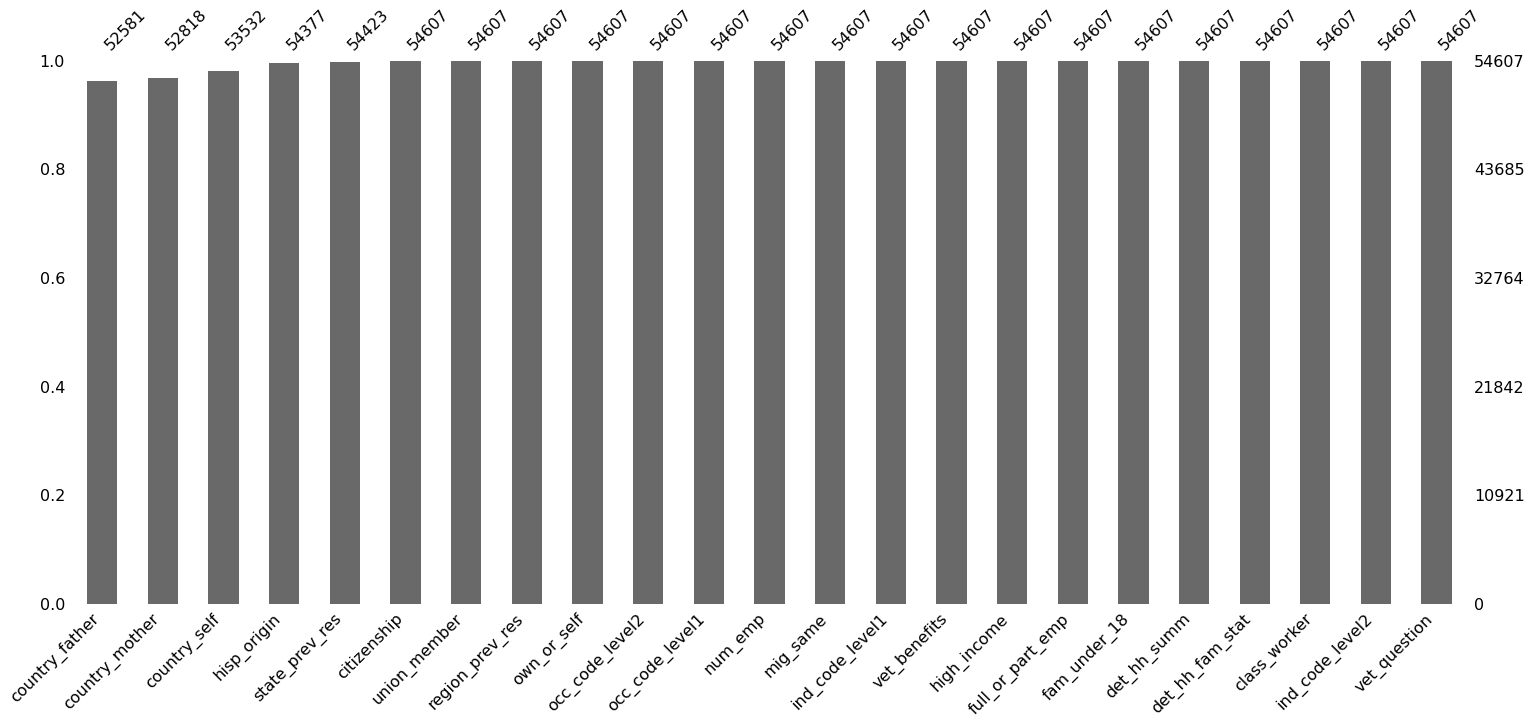

In [124]:
msno.bar(df,sort="ascending")

<AxesSubplot:>

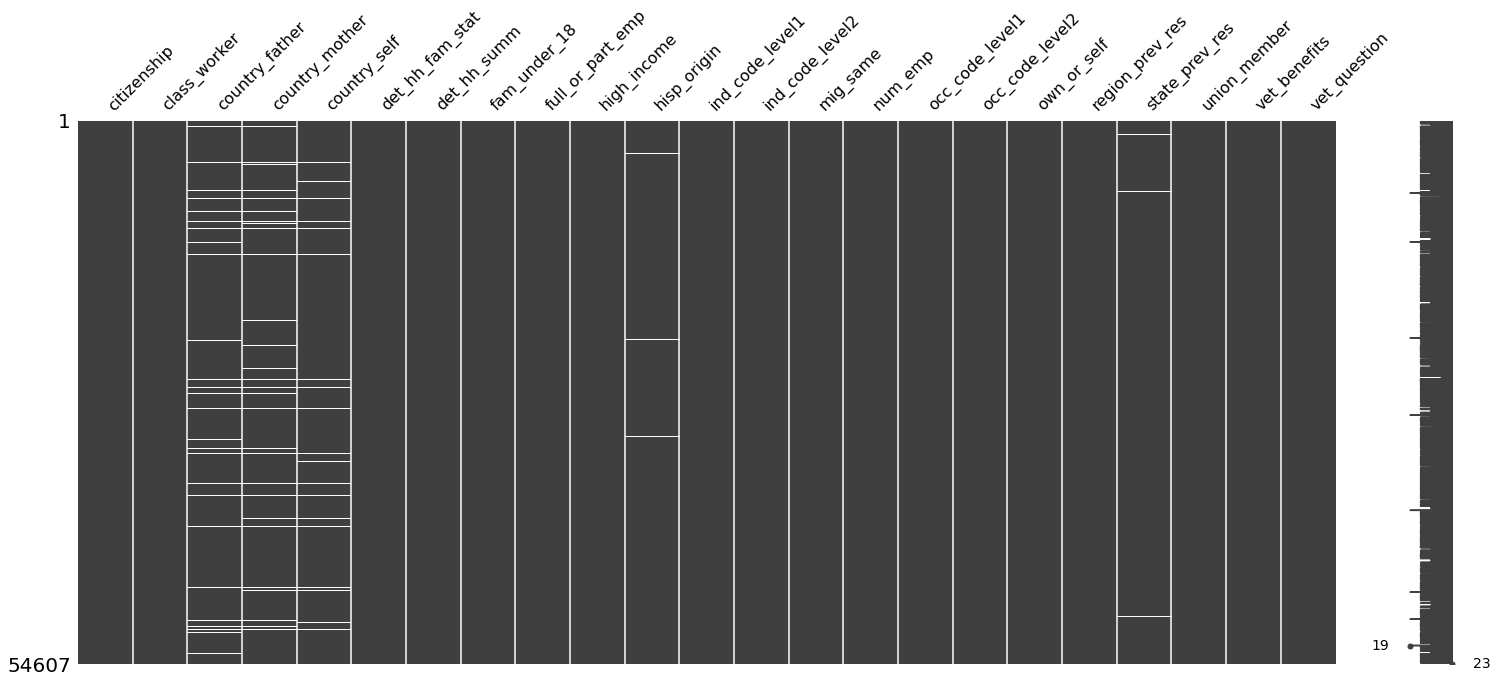

In [125]:
msno.matrix(df)

In [126]:
null_per_column = pd.DataFrame({ col : [df_below_nan_threshold[col].isnull().sum().sum()] for col in df_below_nan_threshold.columns if df_below_nan_threshold[col].isnull().sum().sum()!=0}, index=['number_of_nan']).T.sort_values('number_of_nan')
null_per_column

,number_of_nan
state_prev_res,118
hisp_origin,144
country_self,306
country_mother,528
country_father,611


## trying to do some imputations

on stat_prev_res to start.

In [132]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown="ignore")
X = df[['stat_prev_res']]
enc.fit(X)

KeyError: "None of [Index(['stat_prev_res'], dtype='object')] are in the [columns]"

SyntaxError: invalid syntax (<ipython-input-147-6525055097c4>, line 2)

In [177]:
X = df[['country_mother']]
name=df['country_mother'].unique()
j = name.shape[0]
namelist=[]
for i in range(0,43):
    t=({name[i]:i})
    namelist.append(t)

In [178]:
namelist

[{'United-States': 0},
 {'Haiti': 1},
 {'England': 2},
 {'Puerto-Rico': 3},
 {'South Korea': 4},
 {'Mexico': 5},
 {'Canada': 6},
 {'Cuba': 7},
 {'Italy': 8},
 {'El-Salvador': 9},
 {nan: 10},
 {'Philippines': 11},
 {'Peru': 12},
 {'Poland': 13},
 {'Portugal': 14},
 {'Japan': 15},
 {'Ecuador': 16},
 {'Scotland': 17},
 {'India': 18},
 {'Columbia': 19},
 {'Laos': 20},
 {'Germany': 21},
 {'Yugoslavia': 22},
 {'Guatemala': 23},
 {'Vietnam': 24},
 {'Iran': 25},
 {'Dominican-Republic': 26},
 {'Greece': 27},
 {'China': 28},
 {'Nicaragua': 29},
 {'Ireland': 30},
 {'Jamaica': 31},
 {'Taiwan': 32},
 {'Thailand': 33},
 {'France': 34},
 {'Hungary': 35},
 {'Holand-Netherlands': 36},
 {'Cambodia': 37},
 {'Honduras': 38},
 {'Trinadad&Tobago': 39},
 {'Outlying-U S (Guam USVI etc)': 40},
 {'Hong Kong': 41},
 {'Panama': 42}]

In [131]:
from sklearn.impute import KNNImputer
nan = np.nan
X = df[['stat_prev_res']]
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)

KeyError: "None of [Index(['stat_prev_res'], dtype='object')] are in the [columns]"

In [128]:
X

,country_mother
0,United-States
1,United-States
2,Haiti
3,United-States
4,United-States
...,...
54602,United-States
54603,United-States
54604,United-States
54605,United-States


## dealing with categorical data

In [22]:
df_changed, categories = data_cleaning_functions.change_to_cat(df,threshold=15)

NameError: name 'data_cleaning_functions' is not defined

<AxesSubplot:>

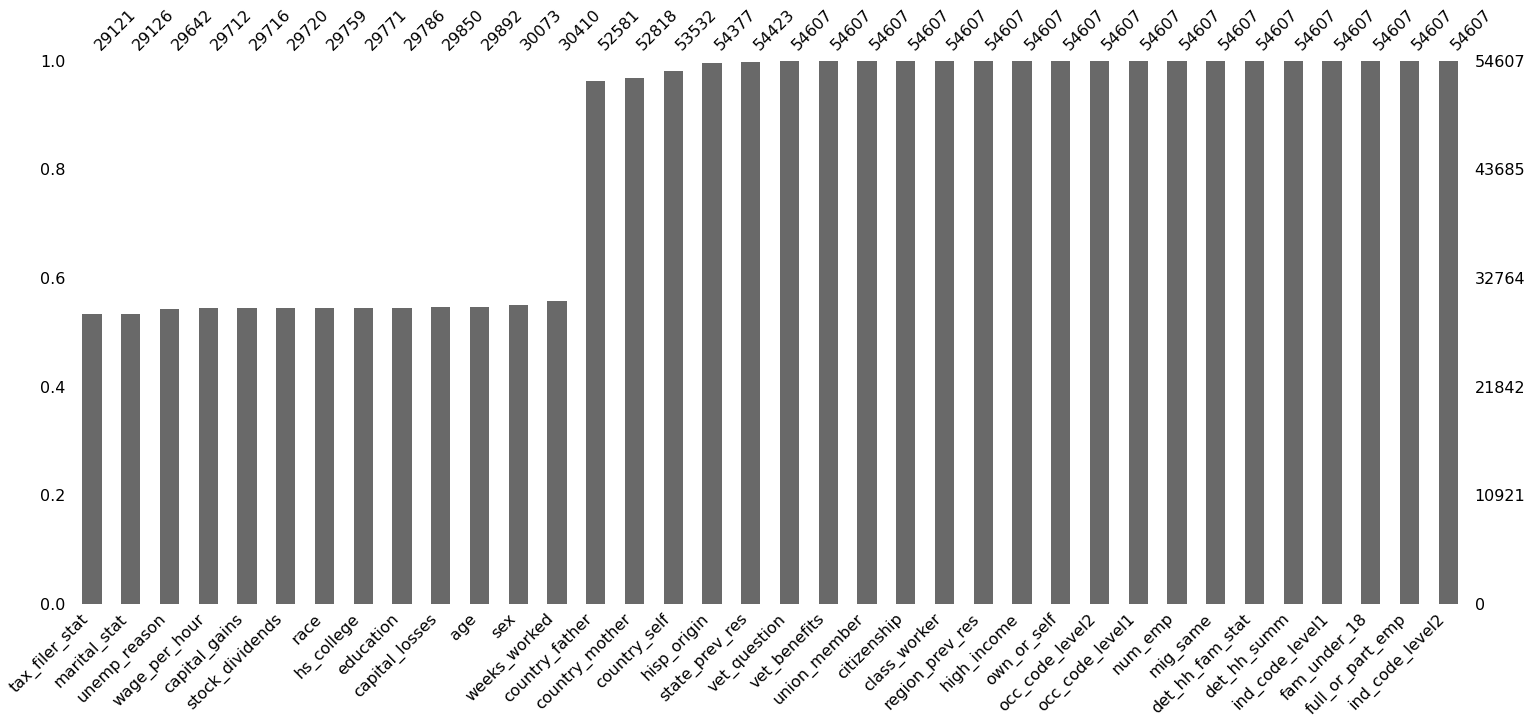